# Meridional transport
V1: Aviv Solodoch 2020-12

V6ryf: 2021-10

In [1]:
print('Ready')

Ready


In [2]:
%matplotlib inline

import cosima_cookbook as cc
from cosima_cookbook import distributed as ccd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
#from celluloid import Camera
import matplotlib.path as mpath
import cartopy.crs as ccrs
import cartopy.feature as cft
import numpy as np
import scipy as sp
import scipy.stats as sp_stats
import netCDF4 as nc
import xarray as xr
import cmocean as cm
from dask.distributed import Client
import dask
dask.config.set({'temporary_directory': '/scratch/g40/as2408'})
from eofs.xarray import Eof

In [3]:
# # client = Client()#n_workers=24)
# client = Client(n_workers=24)
# client

import os
threads_per_worker = 1# Edit as desired

client = Client(
        n_workers=int(os.environ['PBS_NCPUS'])//threads_per_worker,
        threads_per_worker=threads_per_worker,
        memory_limit=f'{3.9*threads_per_worker}gb',
        local_directory=os.path.join(os.environ['PBS_JOBFS'],
                                     'dask-worker-space')
    )
client


Client Scheduler: tcp://127.0.0.1:42679 Dashboard: /proxy/8787/status,Cluster Workers: 16 Cores: 16 Memory: 58.11 GiB


In [14]:
# start_time = '1998-02-01'; end_time   = '2000-01-31'
# start_time = '1958-01-01'; end_time   = '2019-01-01'
# dbfn = '/home/552/as2408/ExpAabwTracers/cyc3_2021-06-09.db'
# session = cc.database.create_session(dbfn)
expt = '01deg_jra55v13_ryf9091'; fn_expsuff = '_ryf9091'
session = cc.database.create_session()

start_time = '2150-01-01'; end_time   = '2180-01-01'
start_time = '2120-01-01'; end_time   = '2180-01-01'
start_time = '2170-01-01'; end_time   = '2180-01-01'
# start_time = '2000-01-01'; end_time   = '2009-12-31'
freq = '1 monthly'# '1 daily'
freqstr = 'monthly'; freq = '1 '+freqstr; freqstr = '_'+freqstr
r = 6371 # Radius of the Earth in km

AnFold='/home/552/as2408/SOMixing/01deg_jra55v13_ryf9091/MeridTransport/' #Output figs etc here
rho = 1025 # mean density of sea-water in kg/m^3. For normalization of transport values to Sv

### Calculate density bin half-width

In [15]:
potrho_edges = cc.querying.getvar(expt=expt, variable='potrho_edges', session=session, n=-1)
potrho = cc.querying.getvar(expt=expt, variable='potrho', session=session, n=-1)
dpotrho = np.unique(potrho.values[1:]-potrho.values[0:-1])/2 #0.0625
print(dpotrho)
dpotrho = dpotrho[0]
print(potrho_edges.values[72:75])
print(potrho.values[72:74])
print(1037.0625-dpotrho)
print(1037.1875-dpotrho)

[0.0625]
[1037.    1037.125 1037.25 ]
[1037.0625 1037.1875]
1037.0
1037.125


In [16]:
expt

'01deg_jra55v13_ryf9091'

In [21]:
# from cosima_cookbook import explore
# ee = explore.ExerimentExplorer(session=session_explore, experiment=expt)
# ee

### Load bathymetry information.

In [7]:
ht = cc.querying.getvar(expt, 'ht', session,n=-1)

In [8]:
xt_ocean = ht.xt_ocean; yt_ocean = ht.yt_ocean

# Superimpose Eulerian and Eddy meridional transports (accumulated eastward)

In [9]:
potrhothresh_cent = 1037.1875#1037.0625#1037.0625
potrhothresh_top = potrhothresh_cent - dpotrho
# start_time='1958-01-16 12:00:00'; end_time='2018-12-16 12:00:00'
# start_time='1958-01-16 12:00:00'; end_time='1968-12-16 12:00:00'
# start_time='1998-01-16 12:00:00'; end_time='2018-12-16 12:00:00'
lats = [-52,-54,-56,-58,-60,-60.5,-60.7,-61.5,-62,-64,-66] #N
# lats = [-50]#[-54,-56,-58,-60,-60.5,-60.7,-61.5,-62,-64,-66] #N
lat = -60
fn = AnFold+'Trans'+str(lat)+'N_underSig2'+str(potrhothresh_top)+'_CumEulerAndEddy'+start_time[0:4]+'to'+end_time[0:4]+'.png'
fn

'/home/552/as2408/SOMixing/01deg_jra55v13_ryf9091/MeridTransport/Trans-60N_underSig21037.125_CumEulerAndEddy2010to2019.png'

In [17]:
lats = np.arange(-66,-48,2)#-50]#[-54,-56,-58,-60,-60.5,-60.7,-61.5,-62,-64,-66] #N

In [24]:
start_time='2170-01-01 12:00:00'; end_time='2179-12-31 12:00:00'
timeslice = slice(start_time,end_time)

distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

CPU times: user 1min 43s, sys: 5.88 s, total: 1min 49s
Wall time: 2min 15s


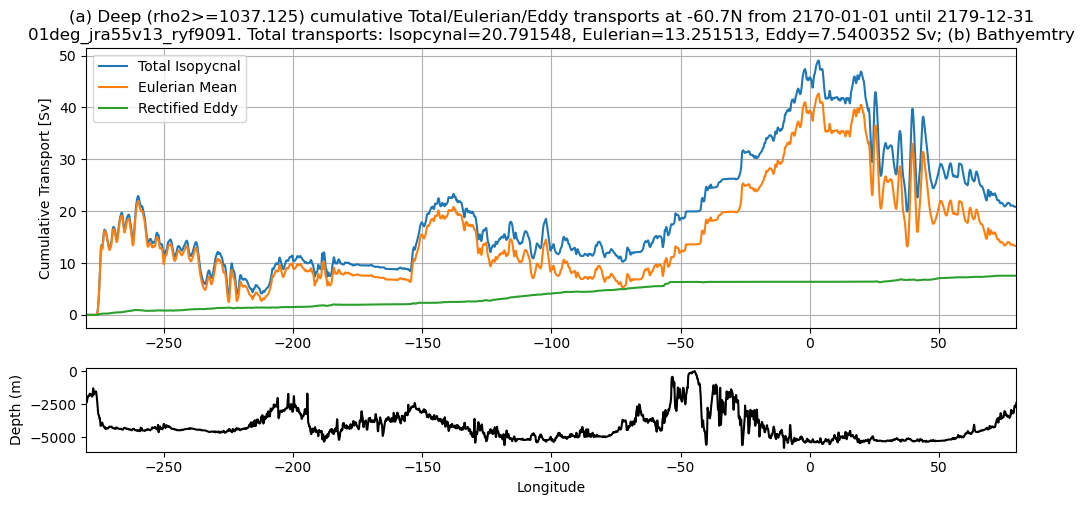

In [25]:
%%time
LoadPrev = 0
potrhothresh_cent = 1037.1875##1037.0625
potrhothresh_top = potrhothresh_cent - dpotrho
# start_time='1958-01-16 12:00:00'; end_time='2018-12-16 12:00:00'
# start_time='1958-01-16 12:00:00'; end_time='1968-12-16 12:00:00'
# start_time='1998-01-16 12:00:00'; end_time='2018-12-16 12:00:00'
lats = [-52,-54,-56,-58,-60,-60.5,-60.7,-61.5,-62,-64,-66] #N
lats = [-60.7]#,-60.7,-61.5,-62,-64,-66] #N
# lats = np.arange(-66,-48,2)#-50]#[-54,-56,-58,-60,-60.5,-60.7,-61.5,-62,-64,-66] #N
PlotTotal = 1
for lat in lats:
    FnData = AnFold+'Trans'+str(lat)+'N_underSig2'+str(potrhothresh_top)+'_Cum_'+start_time[0:4]+'to'+end_time[0:4]
    if LoadPrev==1:
        MeridTrans = xr.open_dataset(FnData+'.nc')
        ty_trans_rho = MeridTrans['ty_trans_rho']; ty_trans = MeridTrans['ty_trans']
    else:   
        ty_trans_rho = cc.querying.getvar(expt, 'ty_trans_rho', session, frequency='1 monthly',
                          start_time=start_time,end_time=end_time)
        ty_trans = cc.querying.getvar(expt, 'ty_trans', session, frequency='1 monthly',
                          start_time=start_time,end_time=end_time)
        pot_rho_2 = cc.querying.getvar(expt, 'pot_rho_2', session, frequency='1 monthly',
                          start_time=start_time,end_time=end_time)
        ty_trans_rho = ty_trans_rho.sel(time=timeslice)
        ty_trans = ty_trans.sel(time=timeslice)
        pot_rho_2 = pot_rho_2.sel(time=timeslice)
        #Limit to lat-section and average in time
        ty_trans = ty_trans.sel(yu_ocean=lat,method='nearest').mean('time')/(1e6*rho) # converts kg/s to Sv
        ty_trans_rho = ty_trans_rho.sel(grid_yu_ocean=lat,method='nearest').mean('time')/(1e6*rho) # converts kg/s to Sv
        pot_rho_2 = pot_rho_2.interp(yt_ocean=ty_trans.yu_ocean.values,method='linear').mean('time')
        #Sum transport at densities above threshold
        ty_trans = ty_trans.where(pot_rho_2>=potrhothresh_top,0).sum('st_ocean'); ty_trans.load()
        ty_trans_rho = ty_trans_rho.where(ty_trans_rho.potrho>=potrhothresh_cent,0).sum('potrho'); ty_trans_rho.load()
    ht_sec = ht.interp(yt_ocean=ty_trans_rho.grid_yu_ocean.values)
    #Calculate cumulative meridional transport due to Lagrangian, Eulerian, and (their difference=) eddy transport terms
    ty_transSum = ty_trans.cumsum('xt_ocean'); 
    ty_trans_rhoSum = ty_trans_rho.rename({'grid_xt_ocean':'xt_ocean'}).cumsum('xt_ocean')
    ty_transEddySum = ty_trans_rhoSum - ty_transSum; 
    
    #Plot Eulerian and Eddy transport sections on one plot
    fig = plt.figure(figsize = (12, 8)); fig = plt.gcf(); 
    ax1 = plt.subplot(2, 1, 1)
    if PlotTotal==1:
        plt.plot(ty_trans_rhoSum.xt_ocean,ty_trans_rhoSum); 
    plt.plot(ty_transSum.xt_ocean,ty_transSum); 
    plt.plot(ty_transEddySum.xt_ocean,ty_transEddySum); 
    plt.margins(x=0); plt.grid(); 
    plt.ylabel('Cumulative Transport [Sv]'); plt.xlabel('')#('Longitude ($^\circ$N)')
    if PlotTotal==1:
        plt.legend(['Total Isopycnal','Eulerian Mean','Rectified Eddy'])
        plt.title('(a) Deep (rho2>='+str(potrhothresh_top)+') cumulative Total/Eulerian/Eddy transports at '+str(lat)+'N from ' 
              + start_time[0:10] + ' until '+end_time[0:10]+'\n'+expt
              +'. Total transports: Isopcynal='+str(ty_trans_rhoSum[-1].values)+', Eulerian='+str(ty_transSum[-1].values)+', Eddy='+str(ty_transEddySum[-1].values)+' Sv; (b) Bathyemtry');    
    else:
        plt.legend(['Eulerian Mean','Rectified Eddy'])
        plt.title('(a) Deep (rho2>='+str(potrhothresh_top)+') cumulative Eulerian and Eddy transports at '+str(lat)+'N from ' 
              + start_time[0:10] + ' until '+end_time[0:10]+'\n'+expt
              +'. Total transports: Eulerian='+str(ty_transSum[-1].values)+', Eddy='+str(ty_transEddySum[-1].values)+' Sv; (b) Bathyemtry');    

    ax2 = plt.subplot(2, 1, 2)
    l, b, w, h = ax1.get_position().bounds
    d = 0.3; ax2.set_position([l, b-h*d-0.05, w, h*d])
    plt.plot(ht_sec.xt_ocean,-ht_sec,'k'); plt.xlim(ht_sec.xt_ocean[0],ht_sec.xt_ocean[-1])
    plt.xlabel('Longitude'); plt.ylabel('Depth (m)'); 
    fig.savefig(AnFold+'Trans'+str(lat)+'N_underSig2'+str(potrhothresh_top)
                +'_CumEulerAndEddy'+start_time[0:4]+'to'+end_time[0:4]+'.png') 
    
    if LoadPrev==0: #Save data to a netcdf file
        MeridTrans = xr.Dataset(data_vars={'ty_trans_rho': ty_trans_rho, 'ty_trans': ty_trans})
        MeridTrans.to_netcdf(FnData+'.nc')
    

In [ ]:
start_time='2010-01-01 12:00:00'; end_time='2019-12-31 12:00:00'
timeslice = slice(start_time,end_time)

distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

CPU times: user 14min 13s, sys: 39.4 s, total: 14min 52s
Wall time: 17min 48s


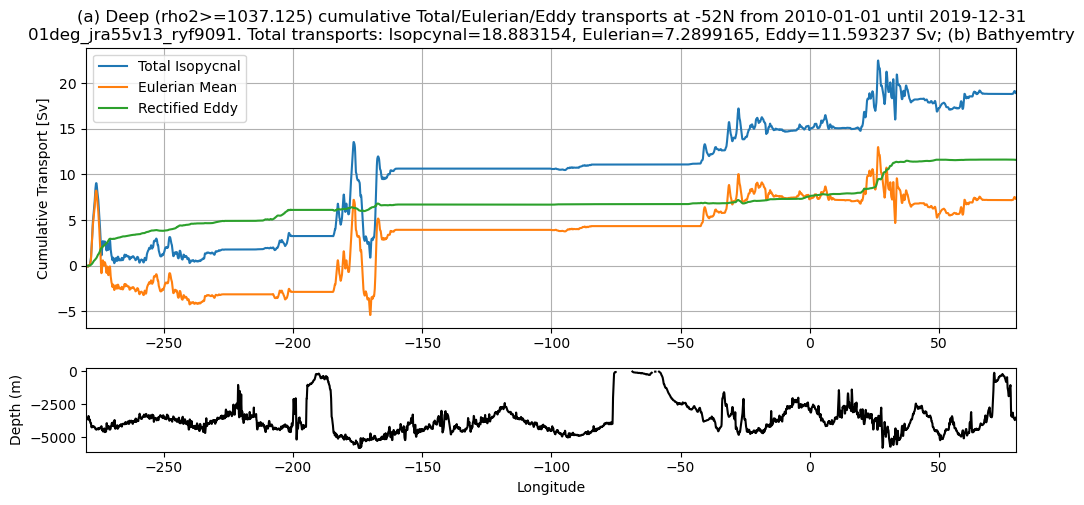

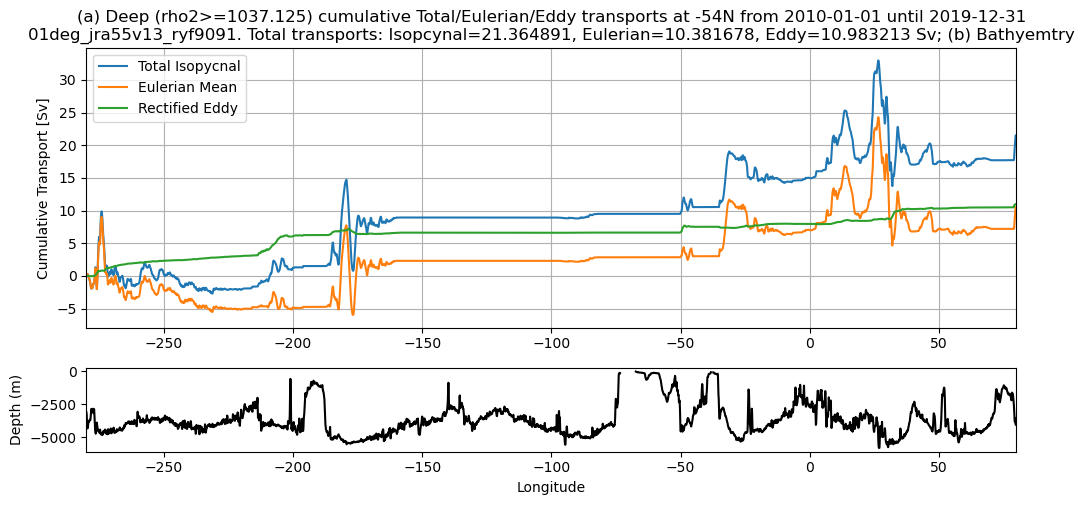

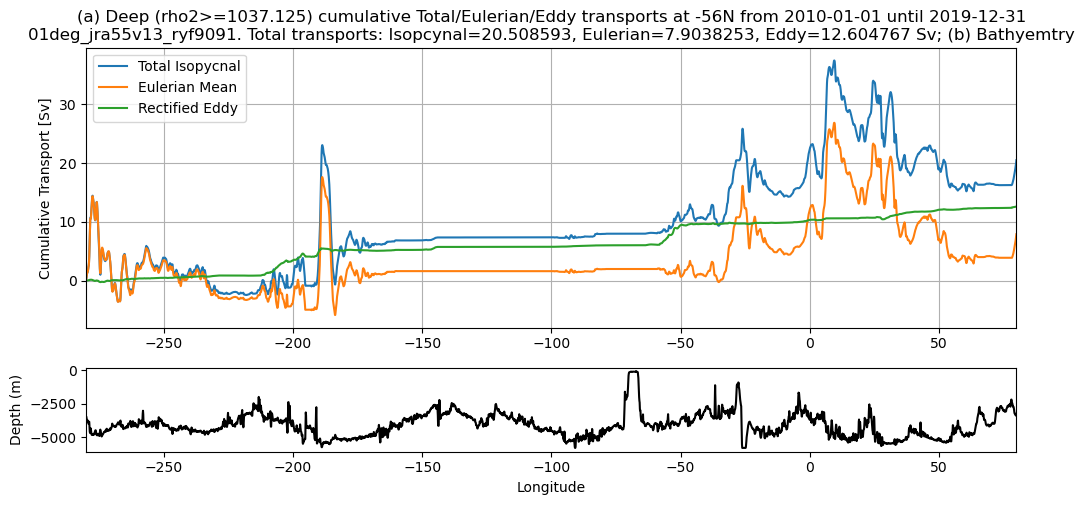

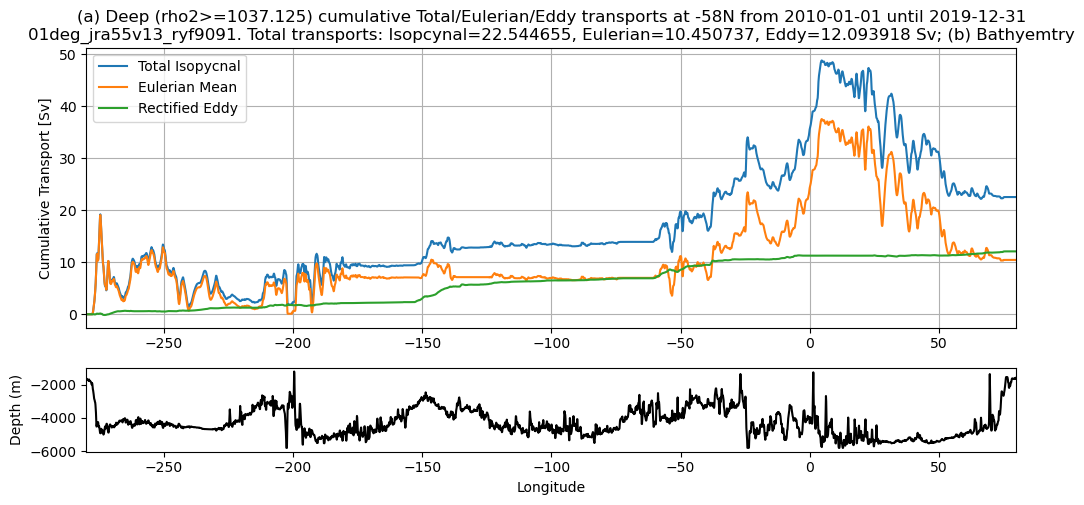

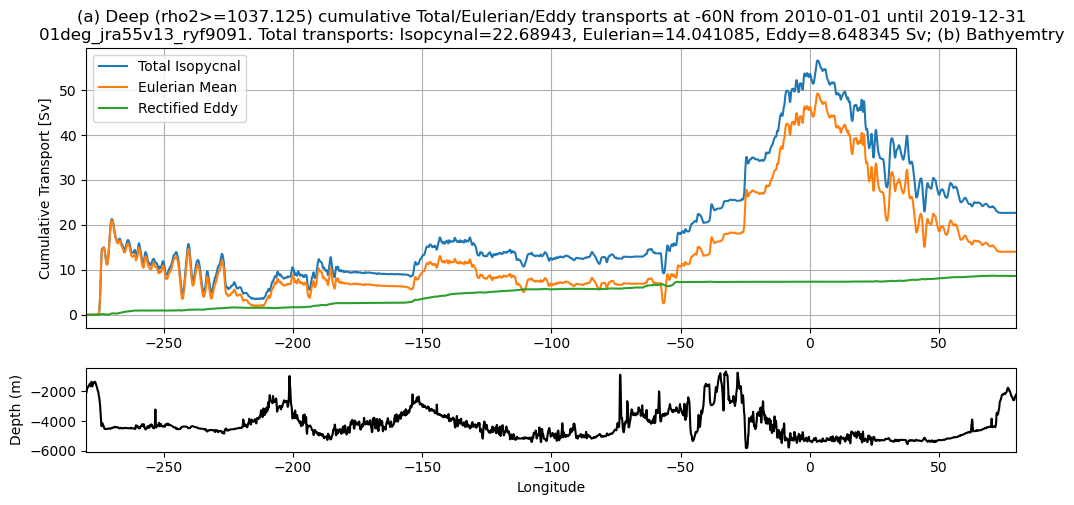

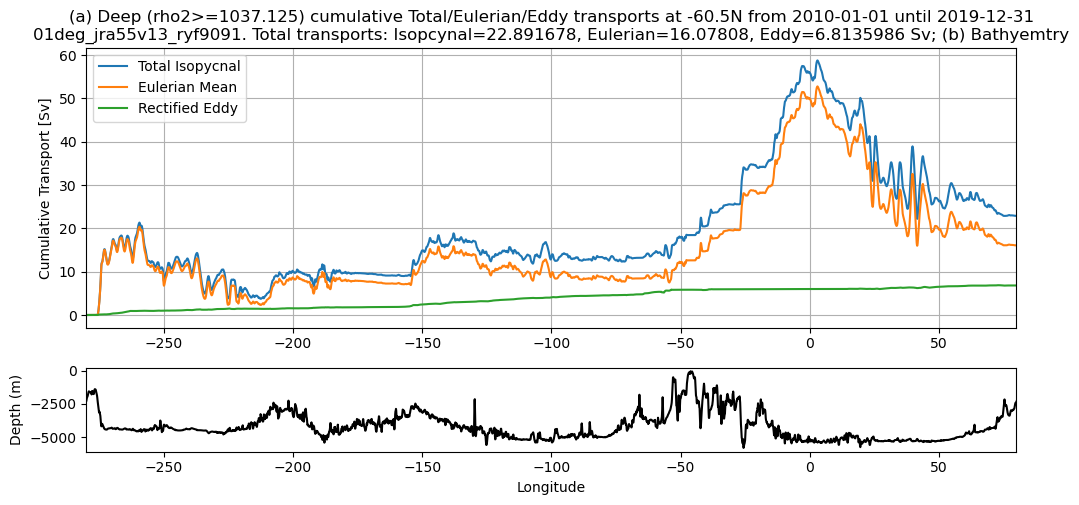

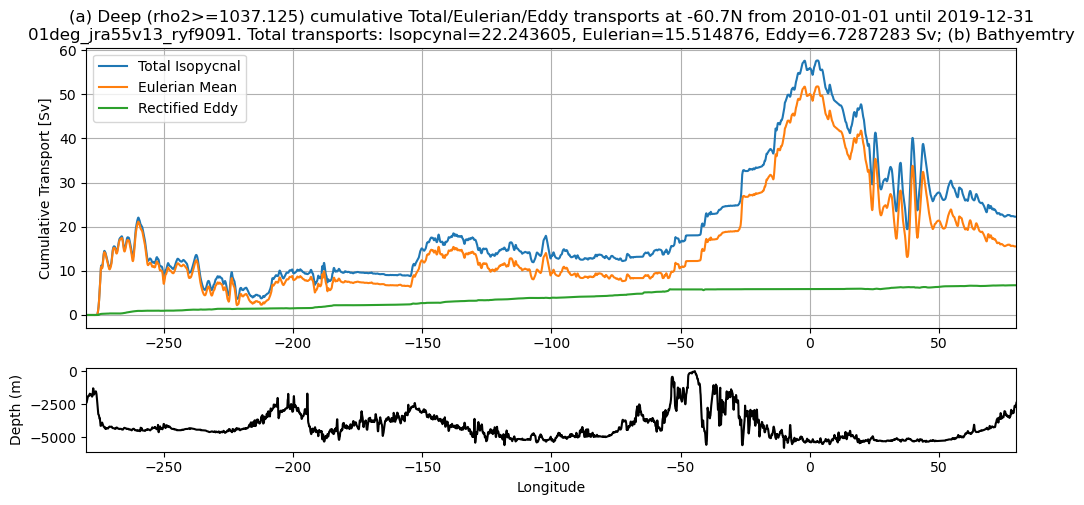

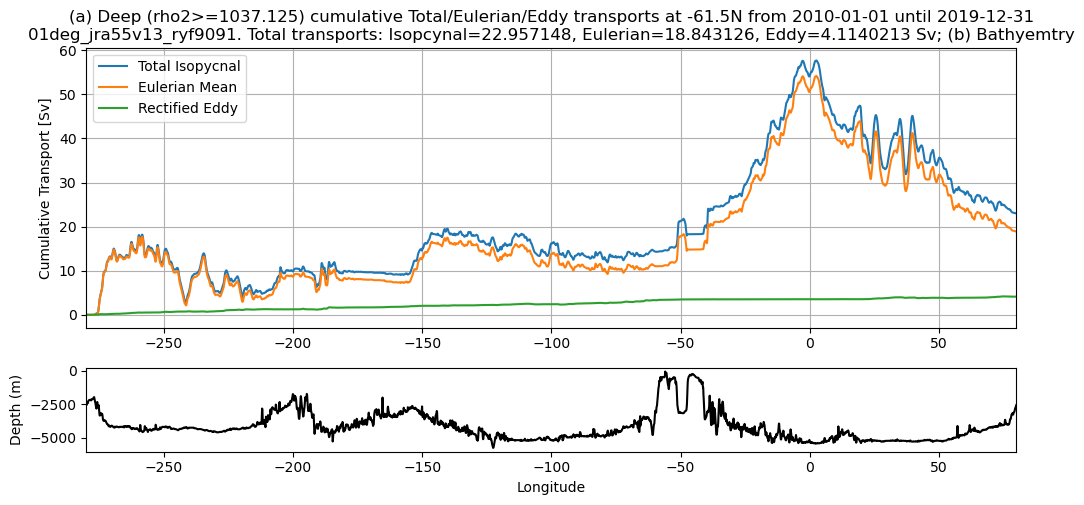

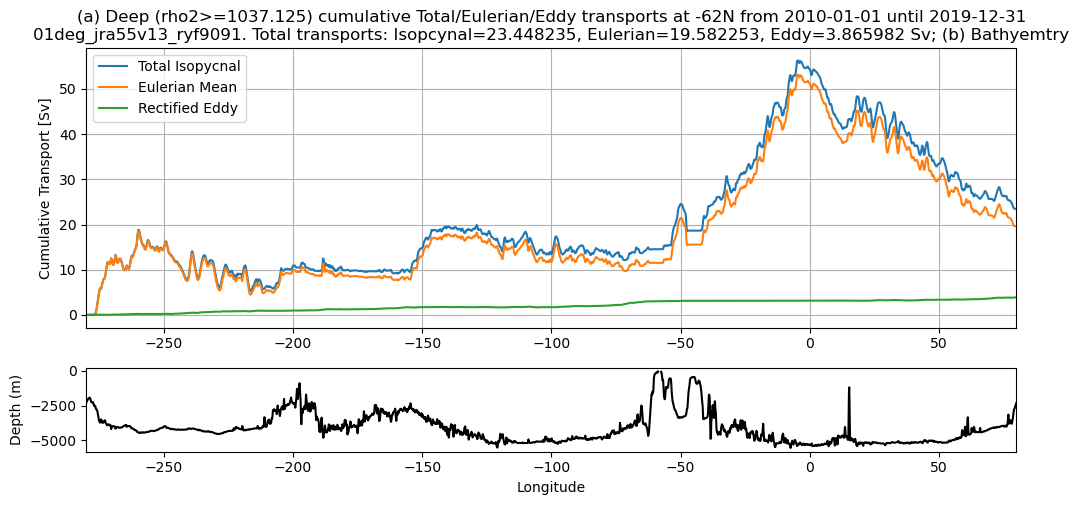

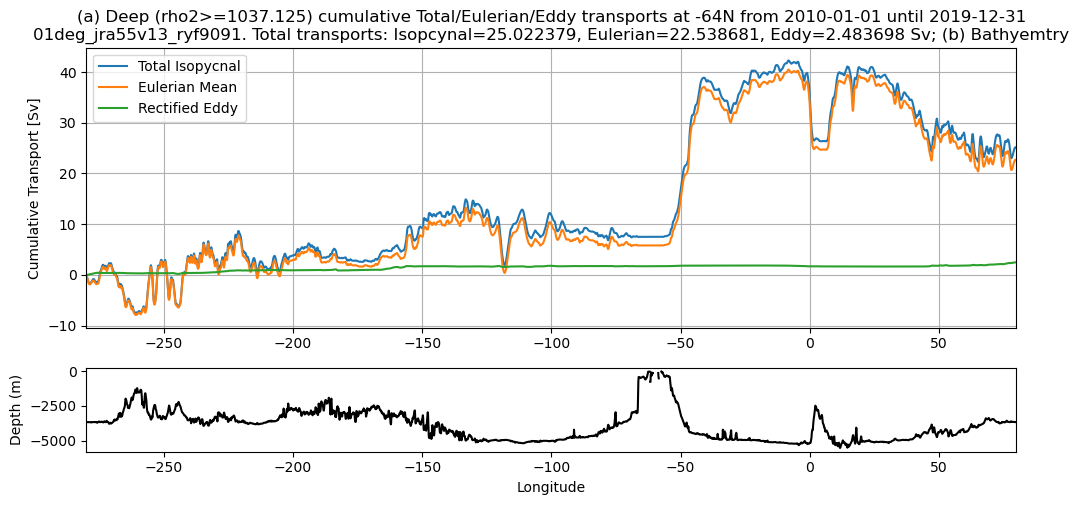

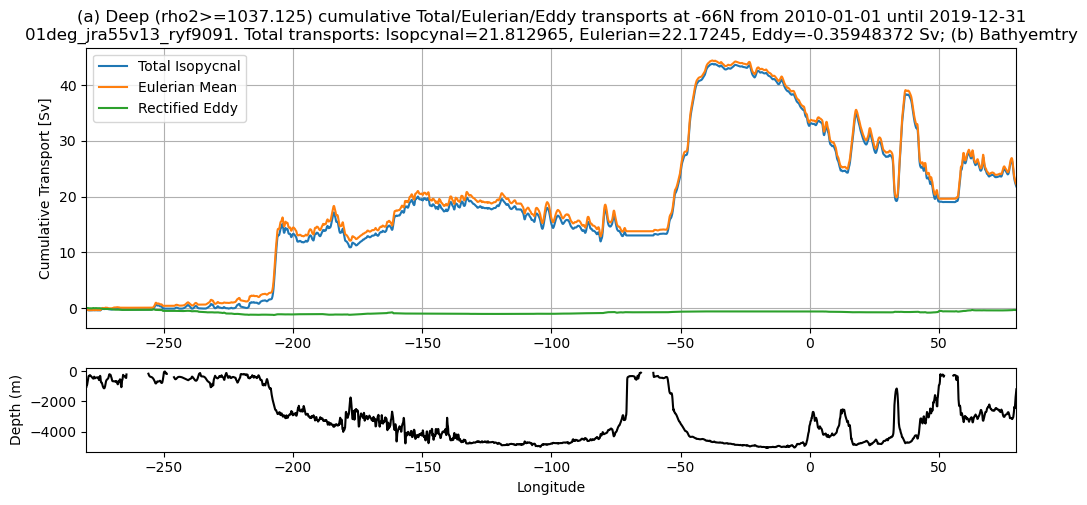

In [12]:
%%time
LoadPrev = 0
potrhothresh_cent = 1037.1875##1037.0625
potrhothresh_top = potrhothresh_cent - dpotrho
# start_time='1958-01-16 12:00:00'; end_time='2018-12-16 12:00:00'
# start_time='1958-01-16 12:00:00'; end_time='1968-12-16 12:00:00'
# start_time='1998-01-16 12:00:00'; end_time='2018-12-16 12:00:00'
lats = [-52,-54,-56,-58,-60,-60.5,-60.7,-61.5,-62,-64,-66] #N
# lats = [-60.7]#,-60.7,-61.5,-62,-64,-66] #N
# lats = np.arange(-66,-48,2)#-50]#[-54,-56,-58,-60,-60.5,-60.7,-61.5,-62,-64,-66] #N
PlotTotal = 1
for lat in lats:
    FnData = AnFold+'Trans'+str(lat)+'N_underSig2'+str(potrhothresh_top)+'_Cum_'+start_time[0:4]+'to'+end_time[0:4]
    if LoadPrev==1:
        MeridTrans = xr.open_dataset(FnData+'.nc')
        ty_trans_rho = MeridTrans['ty_trans_rho']; ty_trans = MeridTrans['ty_trans']
    else:   
        ty_trans_rho = cc.querying.getvar(expt, 'ty_trans_rho', session, frequency='1 monthly',
                          start_time=start_time,end_time=end_time)
        ty_trans = cc.querying.getvar(expt, 'ty_trans', session, frequency='1 monthly',
                          start_time=start_time,end_time=end_time)
        pot_rho_2 = cc.querying.getvar(expt, 'pot_rho_2', session, frequency='1 monthly',
                          start_time=start_time,end_time=end_time)
        ty_trans_rho = ty_trans_rho.sel(time=timeslice)
        ty_trans = ty_trans.sel(time=timeslice)
        pot_rho_2 = pot_rho_2.sel(time=timeslice)
        #Limit to lat-section and average in time
        ty_trans = ty_trans.sel(yu_ocean=lat,method='nearest').mean('time')/(1e6*rho) # converts kg/s to Sv
        ty_trans_rho = ty_trans_rho.sel(grid_yu_ocean=lat,method='nearest').mean('time')/(1e6*rho) # converts kg/s to Sv
        pot_rho_2 = pot_rho_2.interp(yt_ocean=ty_trans.yu_ocean.values,method='linear').mean('time')
        #Sum transport at densities above threshold
        ty_trans = ty_trans.where(pot_rho_2>=potrhothresh_top,0).sum('st_ocean'); ty_trans.load()
        ty_trans_rho = ty_trans_rho.where(ty_trans_rho.potrho>=potrhothresh_cent,0).sum('potrho'); ty_trans_rho.load()
    ht_sec = ht.interp(yt_ocean=ty_trans_rho.grid_yu_ocean.values)
    #Calculate cumulative meridional transport due to Lagrangian, Eulerian, and (their difference=) eddy transport terms
    ty_transSum = ty_trans.cumsum('xt_ocean'); 
    ty_trans_rhoSum = ty_trans_rho.rename({'grid_xt_ocean':'xt_ocean'}).cumsum('xt_ocean')
    ty_transEddySum = ty_trans_rhoSum - ty_transSum; 
    
    #Plot Eulerian and Eddy transport sections on one plot
    fig = plt.figure(figsize = (12, 8)); fig = plt.gcf(); 
    ax1 = plt.subplot(2, 1, 1)
    if PlotTotal==1:
        plt.plot(ty_trans_rhoSum.xt_ocean,ty_trans_rhoSum); 
    plt.plot(ty_transSum.xt_ocean,ty_transSum); 
    plt.plot(ty_transEddySum.xt_ocean,ty_transEddySum); 
    plt.margins(x=0); plt.grid(); 
    plt.ylabel('Cumulative Transport [Sv]'); plt.xlabel('')#('Longitude ($^\circ$N)')
    if PlotTotal==1:
        plt.legend(['Total Isopycnal','Eulerian Mean','Rectified Eddy'])
        plt.title('(a) Deep (rho2>='+str(potrhothresh_top)+') cumulative Total/Eulerian/Eddy transports at '+str(lat)+'N from ' 
              + start_time[0:10] + ' until '+end_time[0:10]+'\n'+expt
              +'. Total transports: Isopcynal='+str(ty_trans_rhoSum[-1].values)+', Eulerian='+str(ty_transSum[-1].values)+', Eddy='+str(ty_transEddySum[-1].values)+' Sv; (b) Bathyemtry');    
    else:
        plt.legend(['Eulerian Mean','Rectified Eddy'])
        plt.title('(a) Deep (rho2>='+str(potrhothresh_top)+') cumulative Eulerian and Eddy transports at '+str(lat)+'N from ' 
              + start_time[0:10] + ' until '+end_time[0:10]+'\n'+expt
              +'. Total transports: Eulerian='+str(ty_transSum[-1].values)+', Eddy='+str(ty_transEddySum[-1].values)+' Sv; (b) Bathyemtry');    

    ax2 = plt.subplot(2, 1, 2)
    l, b, w, h = ax1.get_position().bounds
    d = 0.3; ax2.set_position([l, b-h*d-0.05, w, h*d])
    plt.plot(ht_sec.xt_ocean,-ht_sec,'k'); plt.xlim(ht_sec.xt_ocean[0],ht_sec.xt_ocean[-1])
    plt.xlabel('Longitude'); plt.ylabel('Depth (m)'); 
    fig.savefig(AnFold+'Trans'+str(lat)+'N_underSig2'+str(potrhothresh_top)
                +'_CumEulerAndEddy'+start_time[0:4]+'to'+end_time[0:4]+'.png') 
    
    if LoadPrev==0: #Save data to a netcdf file
        MeridTrans = xr.Dataset(data_vars={'ty_trans_rho': ty_trans_rho, 'ty_trans': ty_trans})
        MeridTrans.to_netcdf(FnData+'.nc')
    